Dataset Information
Dream Housing Finance company deals in all home loans. 
They have presence across all urban, semi urban and rural areas. 
Customer first apply for home loan after that company validates the customer eligibility for loan.
 Company wants to automate the loan eligibility process (real time) based on 
 customer detail provided while filling online application form. 
 These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, 
 Credit History and others. To automate this process, they have given a problem to identify 
 the customers segments, those are eligible for loan amount so that they can specifically target 
 these customers.

This is a standard supervised classification task.A classification problem where
 we have to predict whether a loan would be approved or not. Below is the dataset a

LIBRARIES
pandas
matplotlib
seaborn
scikit-learn

In [2]:
#imorting all the required modules

import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files 
up=files.upload()

Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
Saving Loan Prediction Dataset.csv to Loan Prediction Dataset.csv

In [8]:
#reading data csv file
df=pd.read_csv("https://raw.githubusercontent.com/sameerCoder/DATA_ANALYST_DATASETS/main/Loan%20Prediction%20Dataset.csv")
#below printing first few lines of csv files.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
#describing / statatics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
#information of csv file 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Preprocessing the dataset


In [13]:
#finding the null value of every columns parameter
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#filling measing value with mean value.
#filling the missing value with numericale turm
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [17]:
# MODE we are taken as two values only caterogical values.
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [18]:
#rechaking the null value
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Exploratory Data Analysis


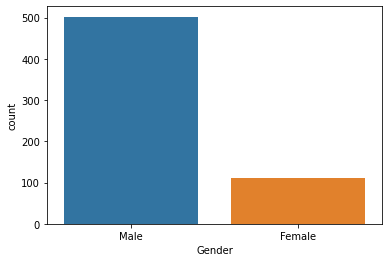

In [19]:
#data visulisation
#categorical atribute visulisation
sns.countplot(df['Gender'])

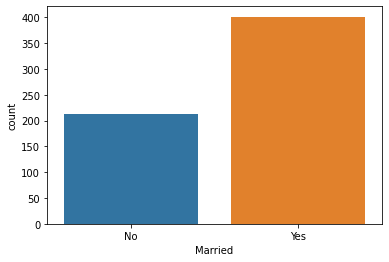

In [21]:
#Married column Visulisation
sns.countplot(df['Married'])

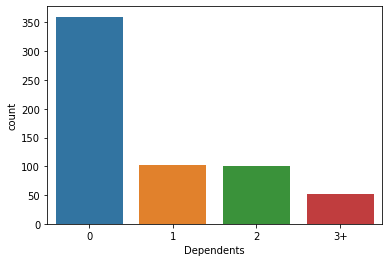

In [22]:
#department column visulisation
sns.countplot(df['Dependents'])

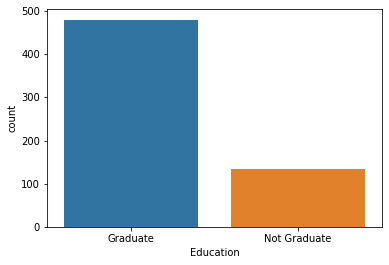

In [23]:
#Eduction column visulisation
sns.countplot(df['Education'])

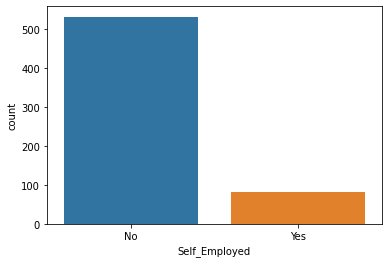

In [24]:
#selfemploye column visulisation
sns.countplot(df['Self_Employed'])

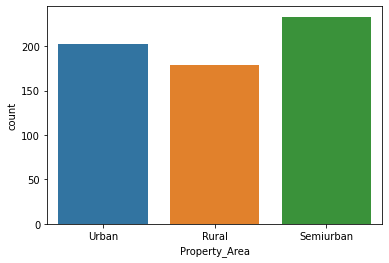

In [25]:
#proparty area visulisation
sns.countplot(df['Property_Area'])

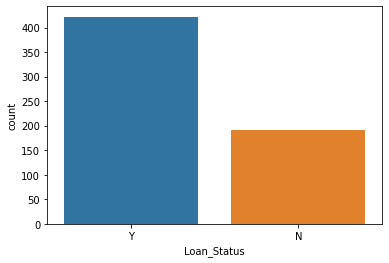

In [26]:
#loanstats visulisation
sns.countplot(df['Loan_Status'])

'\nIt is used basically for univariant set of observations and visualizes it \nthrough a histogram i.e. only one observation and hence we choose one particular column of the dataset.'

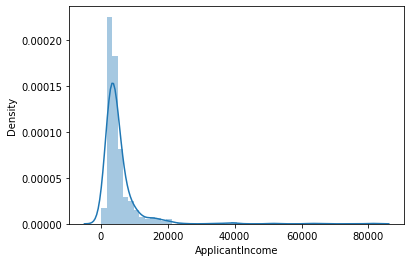

In [30]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])
#Flexibly plot a distribution of observations.
'''
It is used basically for univariant set of observations and visualizes it 
through a histogram i.e. only one observation and hence we choose one particular column of the dataset.'''

In [31]:
#the ploatis not good so we have to do log nurmalization
df["ApplicantIncome"]=np.log(df["ApplicantIncome"])

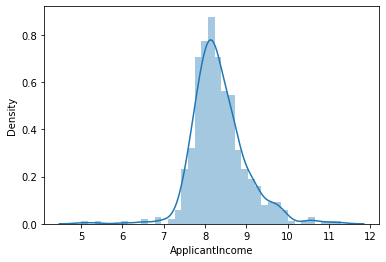

In [32]:
#log scaling plot.
sns.distplot(df["ApplicantIncome"])
#good normalise so that training of model will be in best way and test will be predicted best result.
#mean & median will be very far.

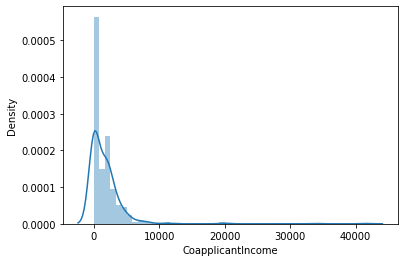

In [33]:
#plot
sns.distplot(df["CoapplicantIncome"])

In [34]:
df["CoapplicantIncome"]=np.log(1+df["CoapplicantIncome"])
#since there is 0 in CoapplicantIncome column so directly we cant do log of 0 ,so adding 1 to each element.
#log 0 is undefined. It's not a real number, 
#because you can never get zero by raising anything to the power of anything else. 

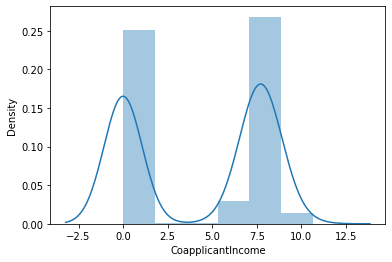

In [35]:
#log normalise plot
sns.distplot(df["CoapplicantIncome"])

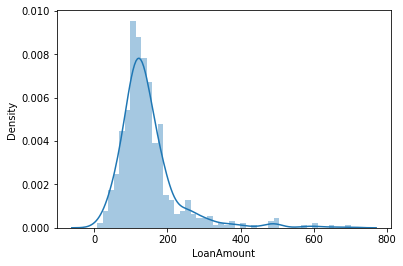

In [36]:
#LoanAmount column Vislualization
sns.distplot(df["LoanAmount"])

In [37]:
df["LoanAmount"]=np.log(df["LoanAmount"])

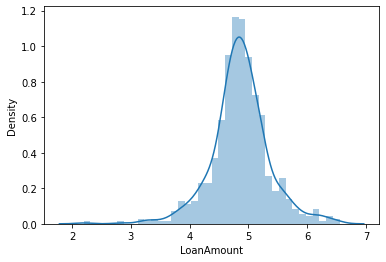

In [38]:
#log normalised #LoanAmount column Vislualization
sns.distplot(df["LoanAmount"])

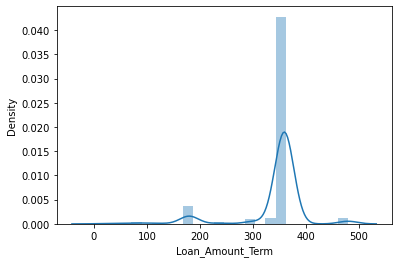

In [39]:
#Loan_Amount_Term column Vislualization
sns.distplot(df['Loan_Amount_Term'])

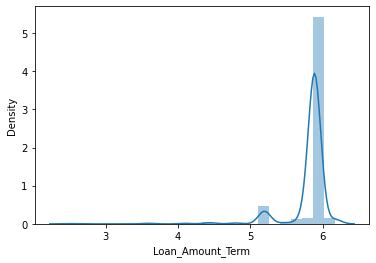

In [40]:
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term'])


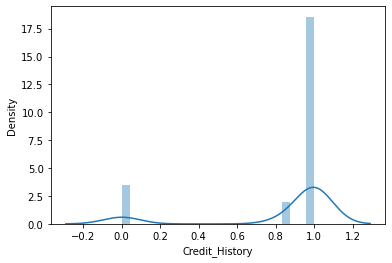

In [41]:
#Credit_History column Vislualization
sns.distplot(df['Credit_History'])

Creation of new attributes / Columns / Parameters

In [42]:
#adding a new  income column to data frame
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.986426,5.886104,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N,15.749312
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.0,Urban,Y,15.622700
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y,8.699515


Log Transformation Creating new column

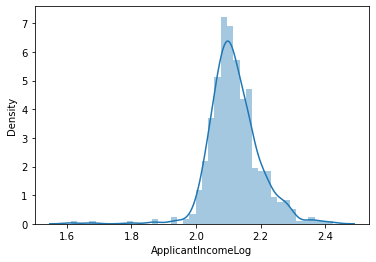

In [43]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

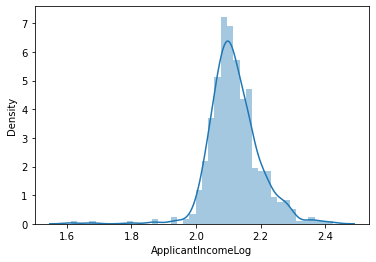

In [44]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

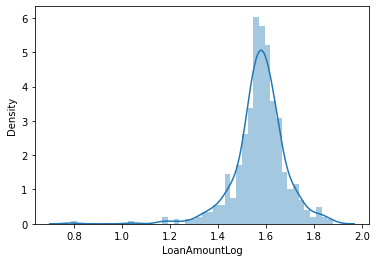

In [45]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

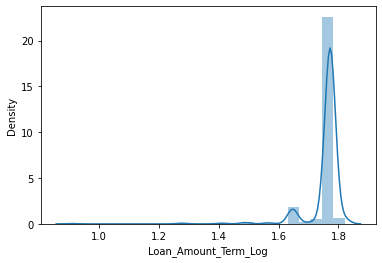

In [46]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

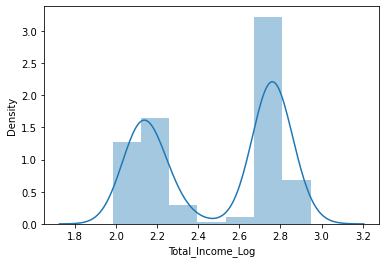

In [47]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df["Total_Income_Log"])

Coorelation Matrix, Coorelation with Numeric Attributes

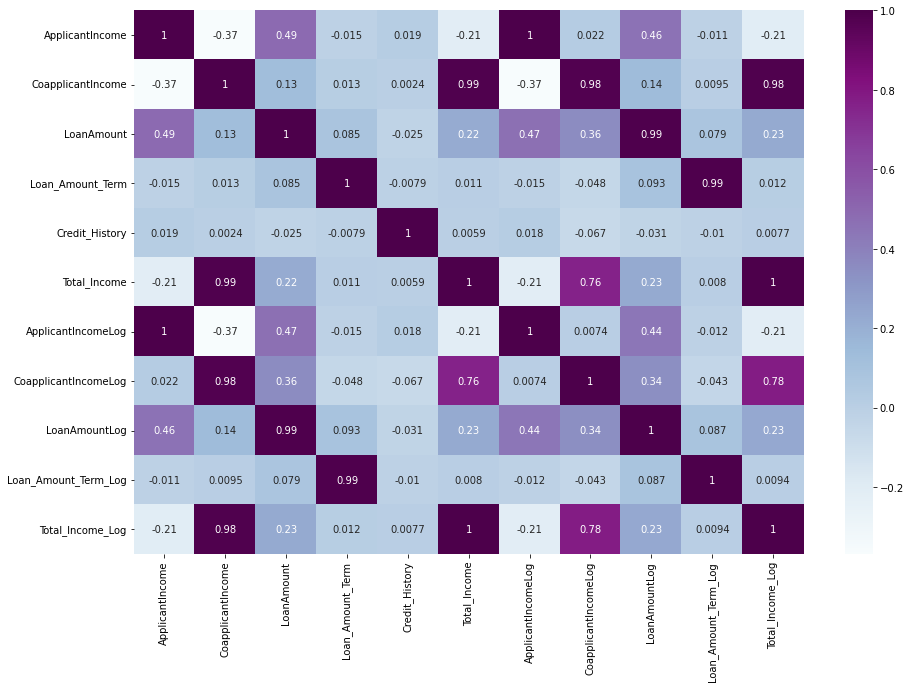

In [48]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")
#columnA related to columnB

In [49]:
#cheking the data fram
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.986426,5.886104,1.0,Urban,Y,8.674026,2.160333,-inf,1.606719,1.772594,2.160333
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N,15.749312,2.131810,1.990501,1.579397,1.772594,2.756797
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y,8.006368,2.080237,-inf,1.432618,1.772594,2.080237
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.0,Urban,Y,15.622700,2.061368,2.049754,1.566007,1.772594,2.748725
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y,8.699515,2.163267,-inf,1.599137,1.772594,2.163267


Droping the Columns

In [50]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,2.160333,1.606719,1.772594,2.160333
1,Male,Yes,1,Graduate,No,1.0,Rural,N,2.131810,1.579397,1.772594,2.756797
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.080237,1.432618,1.772594,2.080237
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2.061368,1.566007,1.772594,2.748725
4,Male,No,0,Graduate,No,1.0,Urban,Y,2.163267,1.599137,1.772594,2.163267


Label Encoding

In [51]:
#Categorical Values columns
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [52]:
df.head()
#In Computer Yes=True=1
#No=False=0

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,2.160333,1.606719,1.772594,2.160333
1,1,1,1,0,0,1.0,0,0,2.131810,1.579397,1.772594,2.756797
2,1,1,0,0,1,1.0,2,1,2.080237,1.432618,1.772594,2.080237
3,1,1,0,1,0,1.0,2,1,2.061368,1.566007,1.772594,2.748725
4,1,0,0,0,0,1.0,2,1,2.163267,1.599137,1.772594,2.163267


Train-Test Split

In [53]:
#specifing inpute and outpute attribute
#Droping Loane stats
X=df.drop(columns=['Loan_Status'],axis=1)
print(X)
y=df['Loan_Status']
print("Y",y)

     Gender  Married  ...  Loan_Amount_Term_Log  Total_Income_Log
0         1        0  ...              1.772594          2.160333
1         1        1  ...              1.772594          2.756797
2         1        1  ...              1.772594          2.080237
3         1        1  ...              1.772594          2.748725
4         1        0  ...              1.772594          2.163267
..      ...      ...  ...                   ...               ...
609       0        0  ...              1.772594          2.075994
610       1        1  ...              1.647303          2.118687
611       1        1  ...              1.772594          2.672834
612       1        1  ...              1.772594          2.189827
613       0        0  ...              1.772594          2.131810

[614 rows x 11 columns]
Y 0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
#training size=75%
#random_state=42
#Ever time get same random value.

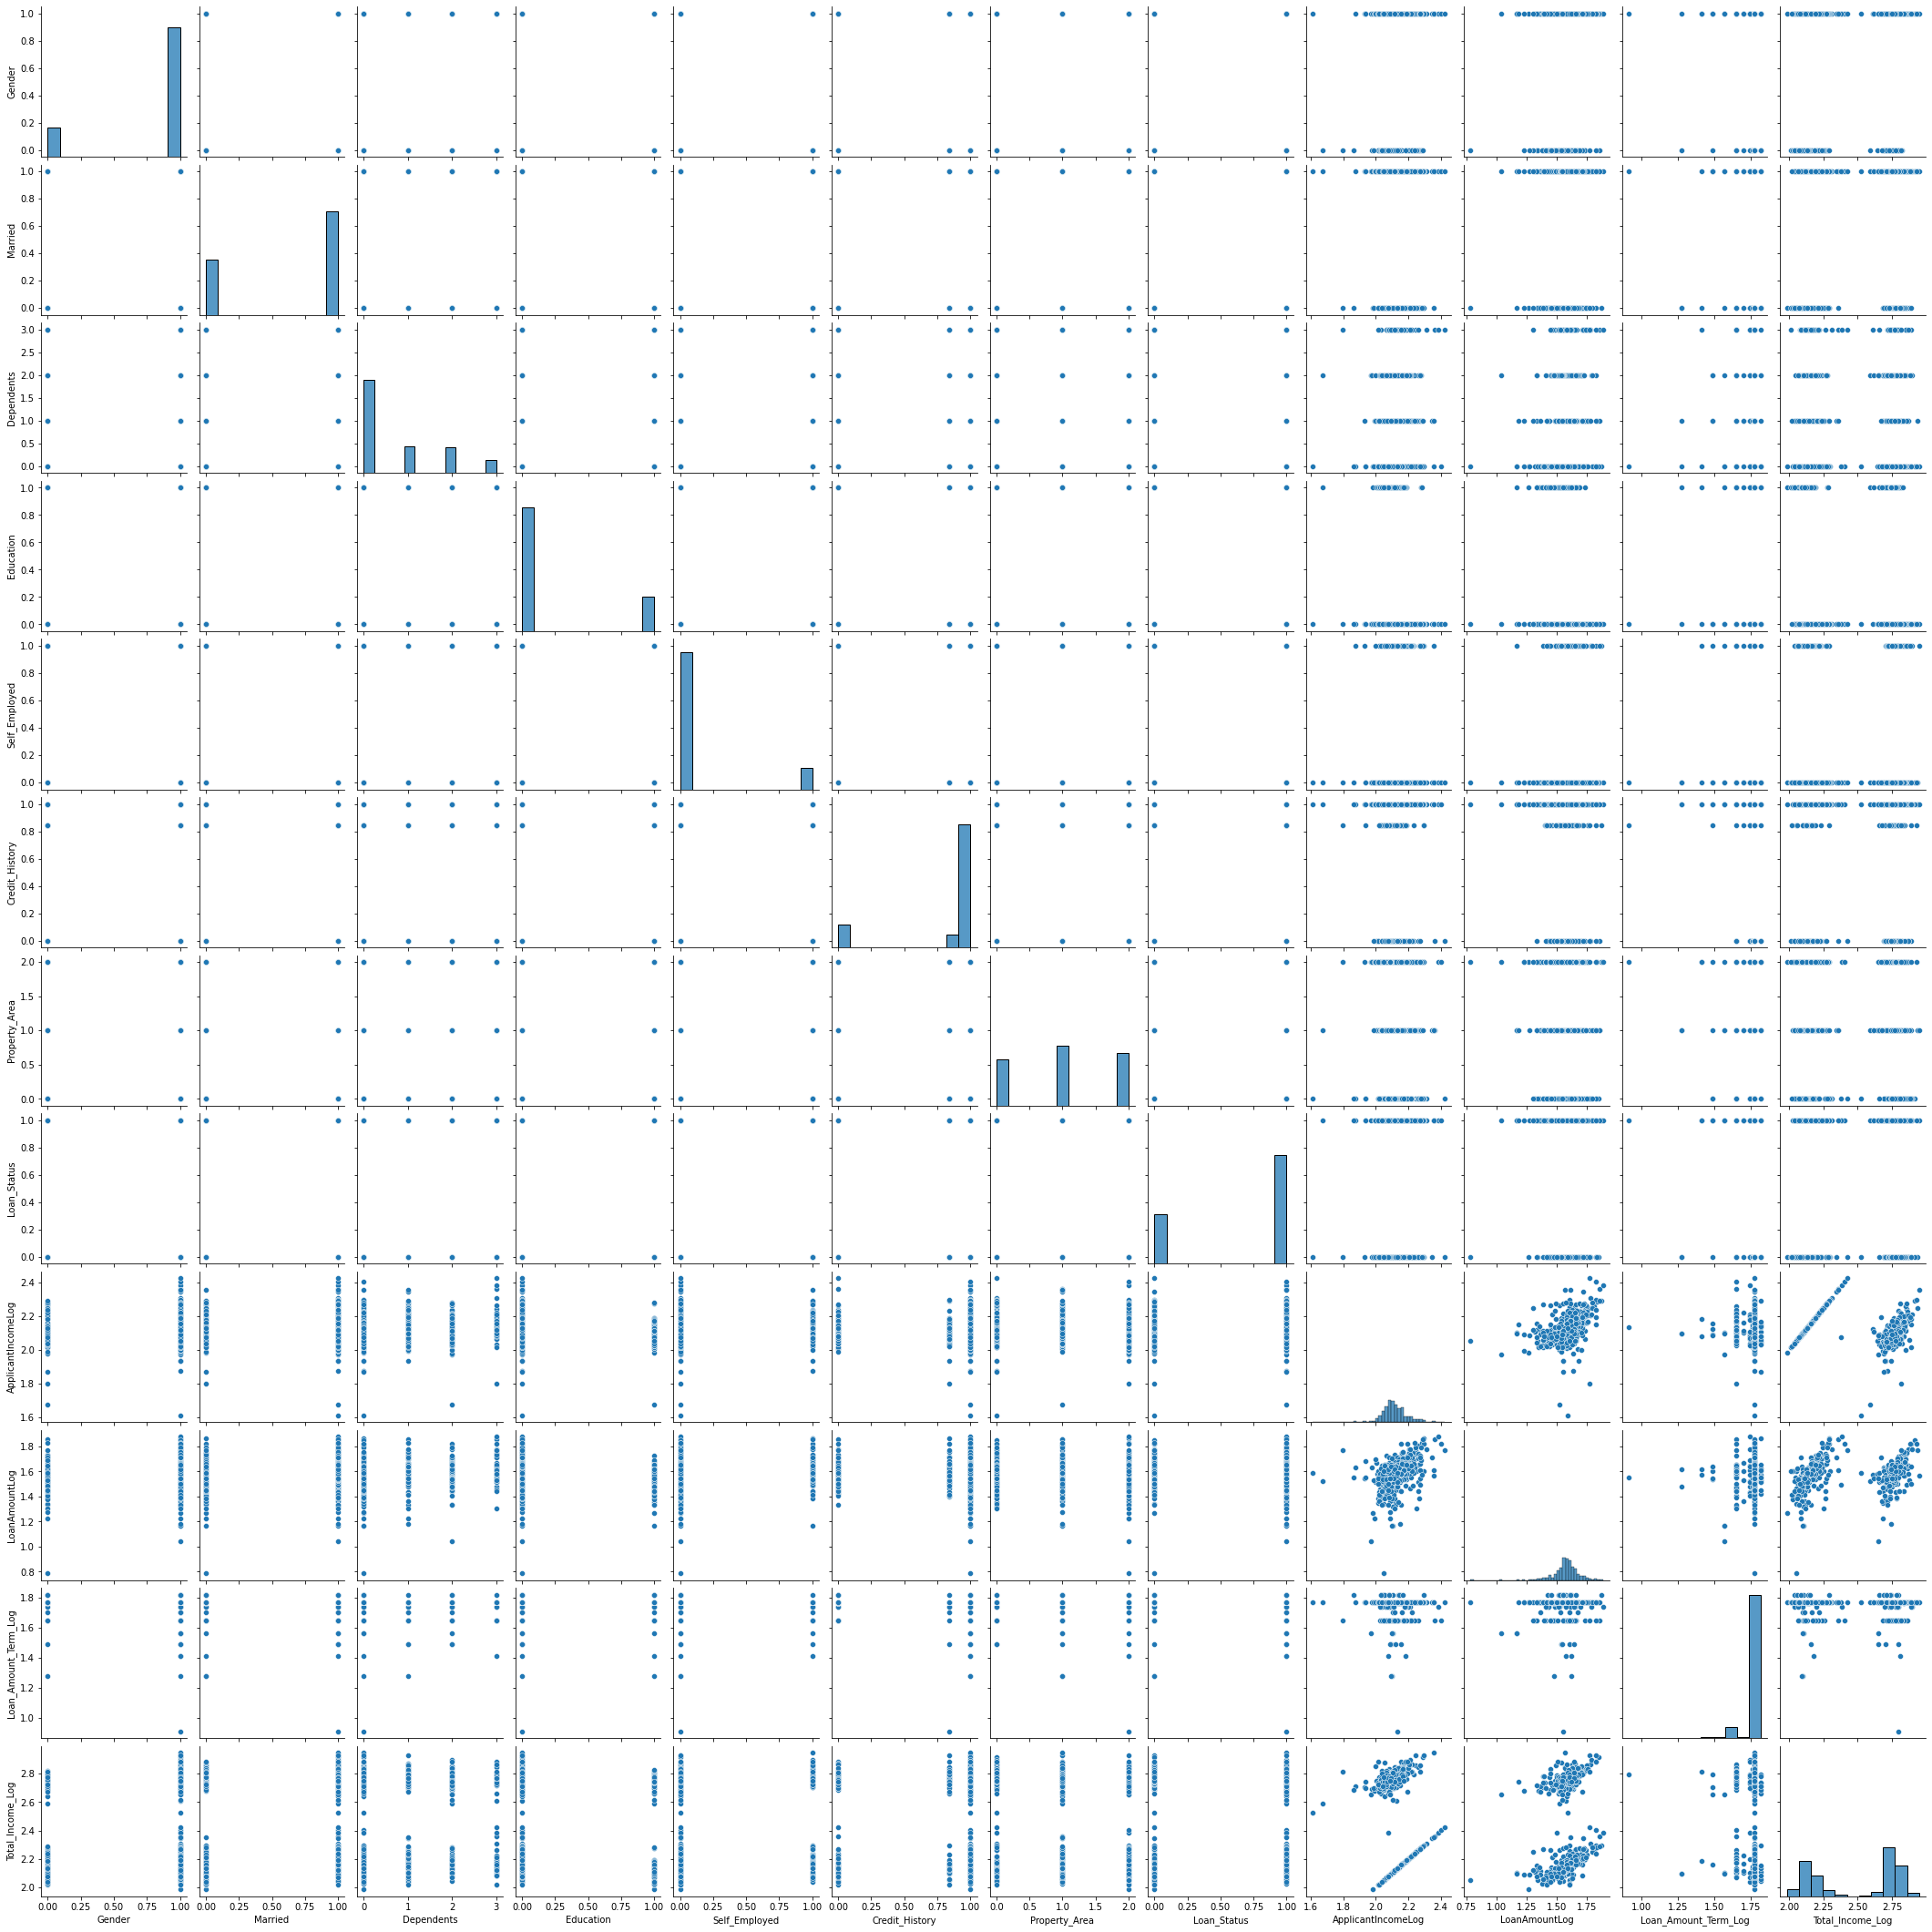

In [56]:
sns.pairplot(data=df)

# This is formatted as code

# This is formatted as code
Model Training

In [57]:
# classify function
#cross_val_score returns score of test fold .
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [58]:
#MODEL1
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)
#cross validation is giving the output of overall model.

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [59]:
#MODEL2
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 66.88311688311688
Cross validation is 72.1498067439691


In [60]:
#MODEL3
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 79.48154071704651


In [61]:
#MODEL4
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 75.32467532467533
Cross validation is 76.87325069972012


Hyperparameter tuning

In [62]:
#Keep on changing the parameter values to tune the model .
#for example - n_estimators=10
#n_estimators=20,100
#n_estimators is the number of trees to be used in the forest,
#n_estimators in general the number of samples on which this algorithm
model = RandomForestClassifier(n_estimators=10, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 74.67532467532467
Cross validation is 76.06424097027855


In [63]:
#MODEL 1 CHECKING ERROR

In [64]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
#Training the data with RandomForestClassifier()

RandomForestClassifier()

In [65]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[23, 31],
       [ 8, 92]])

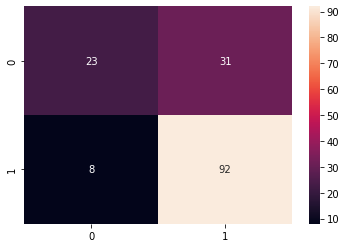

In [66]:
sns.heatmap(cm, annot=True)

In [67]:
#28 correct for 0 values and 97 correct for 1 value
#left digonal show the number how many it has precited correctly.

In [68]:
#MODEL2 ERROR

In [69]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [70]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[21, 33],
       [ 2, 98]])

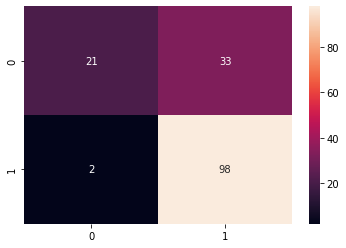

In [71]:
sns.heatmap(cm, annot=True)

ALGORITHMS
Logistic Regression
Decision Tree
Random Forest
Extra Tress